In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("D:/Github/Predicting-House-Rent-Using-ML/House_Rent_Dataset.csv")

# Getting Dataset Information for EDA

In [3]:
df.info

<bound method DataFrame.info of      Posted On  BHK  Size              Floor Words  Floor Number  \
0     08-06-22    2  1320  Lower Basement out of 2          -2.0   
1     13-05-22    2   800               1 out of 3           1.0   
2     16-05-22    2  1000               1 out of 3           1.0   
3     04-07-22    2   800               1 out of 2           1.0   
4     09-05-22    2   850               1 out of 2           1.0   
...        ...  ...   ...                      ...           ...   
4741  18-05-22    2  1000               3 out of 5           3.0   
4742  15-05-22    3  2000               1 out of 4           1.0   
4743  10-07-22    3  1750               3 out of 5           3.0   
4744  06-07-22    3  1500             23 out of 34          23.0   
4745  04-05-22    2  1000               4 out of 5           4.0   

      Total Floors    Area Type             Area Locality       City  \
0              2.0   Super Area                Ballygunge    Kolkata   
1      

In [4]:
df.shape

(4746, 14)

In [5]:
df.head

<bound method NDFrame.head of      Posted On  BHK  Size              Floor Words  Floor Number  \
0     08-06-22    2  1320  Lower Basement out of 2          -2.0   
1     13-05-22    2   800               1 out of 3           1.0   
2     16-05-22    2  1000               1 out of 3           1.0   
3     04-07-22    2   800               1 out of 2           1.0   
4     09-05-22    2   850               1 out of 2           1.0   
...        ...  ...   ...                      ...           ...   
4741  18-05-22    2  1000               3 out of 5           3.0   
4742  15-05-22    3  2000               1 out of 4           1.0   
4743  10-07-22    3  1750               3 out of 5           3.0   
4744  06-07-22    3  1500             23 out of 34          23.0   
4745  04-05-22    2  1000               4 out of 5           4.0   

      Total Floors    Area Type             Area Locality       City  \
0              2.0   Super Area                Ballygunge    Kolkata   
1        

In [6]:
df.isnull().sum()

Posted On            0
BHK                  0
Size                 0
Floor Words          0
Floor Number         3
Total Floors         3
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
Rent                 0
dtype: int64

<h3> Missing data in floor number and total floors

In [7]:
df.dtypes

Posted On             object
BHK                    int64
Size                   int64
Floor Words           object
Floor Number         float64
Total Floors         float64
Area Type             object
Area Locality         object
City                  object
Furnishing Status     object
Tenant Preferred      object
Bathroom               int64
Point of Contact      object
Rent                   int64
dtype: object

In [8]:
categorical_feat=['Area Type','City', 'Furnishing Status','Tenant Preferred', 'Point of Contact']
numerical_feat = ['BHK','Size','Floor Number',
       'Total Floors','Bathroom']
dropping = ['Posted On', 'Floor Words','Area Locality']

In [9]:
df.columns

Index(['Posted On', 'BHK', 'Size', 'Floor Words', 'Floor Number',
       'Total Floors', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'Rent'],
      dtype='object')

# Dropping Unnecessary Values

In [10]:
df.drop(['Posted On', 'Floor Words','Area Locality'],axis=1)

,BHK,Size,Floor Number,Total Floors,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent
0,2,1320,-2.0,2.0,Super Area,Kolkata,Furnished,Bachelors/Family,2,Contact Owner,45000
1,2,800,1.0,3.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,20000
2,2,1000,1.0,3.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,17000
3,2,800,1.0,2.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,10000
4,2,850,1.0,2.0,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,7500
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,3.0,5.0,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,15000
4742,3,2000,1.0,4.0,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,29000
4743,3,1750,3.0,5.0,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,35000
4744,3,1500,23.0,34.0,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,45000


# Categorical Features Insight

In [11]:
data = df[categorical_feat]
for col in data:
    print('Feature:',col,'--',data[col].unique(),'--count is--',len(data[col].unique()))

Feature: Area Type -- ['Super Area' 'Carpet Area' 'Built Area'] --count is-- 3
Feature: City -- ['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad'] --count is-- 6
Feature: Furnishing Status -- ['Furnished' 'Semi-Furnished' 'Unfurnished'] --count is-- 3
Feature: Tenant Preferred -- ['Bachelors/Family' 'Bachelors' 'Family'] --count is-- 3
Feature: Point of Contact -- ['Contact Owner' 'Contact Agent' 'Contact Builder'] --count is-- 3


# Visualization

In [12]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import style

In [13]:
plt.style.use('dark_background')

# Numerical Data Plot

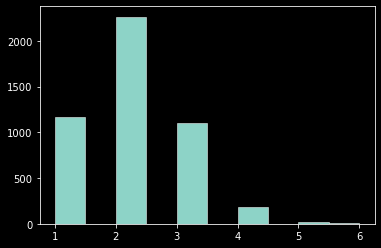

In [14]:
bhk_plot = df['BHK'].hist(grid=False,linewidth=0.5, edgecolor="white")

In [15]:
# arr_data = df['BHK'].unique()
# print(arr_data)

In [16]:
# count_data = df['BHK']
# for i in arr_data:
#     for j in count_data:
#         if arr_data[i]==
        
    

# print(count_data)

#bhk_pie = plt.pie(arr_data,labels = arr_data)

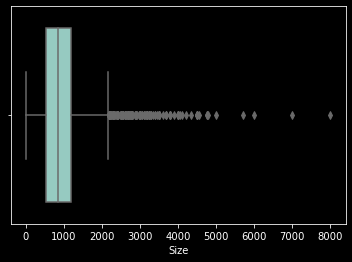

In [17]:
size_sns = sns.boxplot(x="Size",data=df)

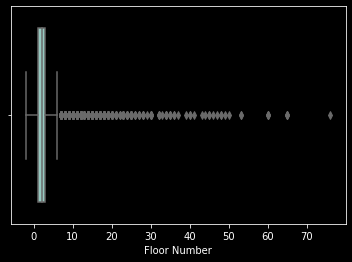

In [18]:
size_floornum = sns.boxplot(x='Floor Number',data=df)

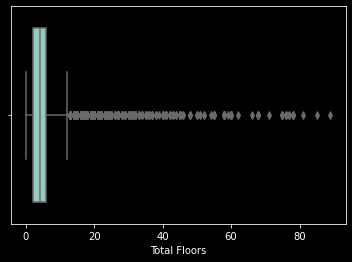

In [19]:
size_floor_total = sns.boxplot(x='Total Floors',data=df)

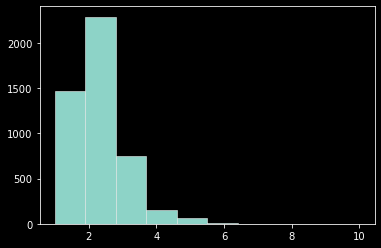

In [20]:
bathroom_plot = df['Bathroom'].hist(grid=False,linewidth=0.5, edgecolor="white")

# Categorical Plots

<AxesSubplot:xlabel='Area Type', ylabel='Rent'>

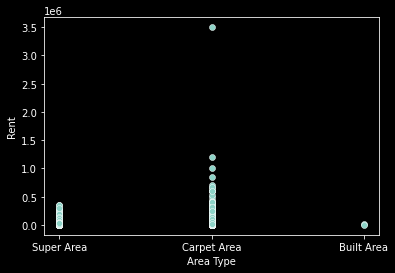

In [21]:
sns.scatterplot(x='Area Type',y='Rent',data=df)

<AxesSubplot:xlabel='City', ylabel='Rent'>

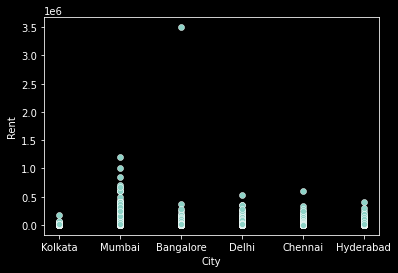

In [22]:
sns.scatterplot(x='City',y='Rent',data=df)

<AxesSubplot:xlabel='Furnishing Status', ylabel='Rent'>

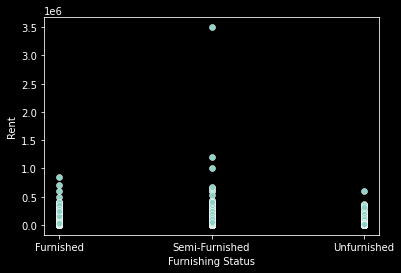

In [23]:
sns.scatterplot(x='Furnishing Status',y='Rent',data=df)

<AxesSubplot:xlabel='Tenant Preferred', ylabel='Rent'>

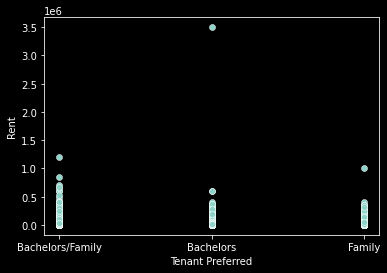

In [24]:
sns.scatterplot(x='Tenant Preferred',y='Rent',data=df)

<AxesSubplot:xlabel='Point of Contact', ylabel='Rent'>

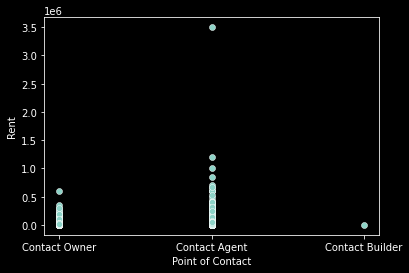

In [25]:
sns.scatterplot(x='Point of Contact',y='Rent',data=df)

# Numerical Pairplot

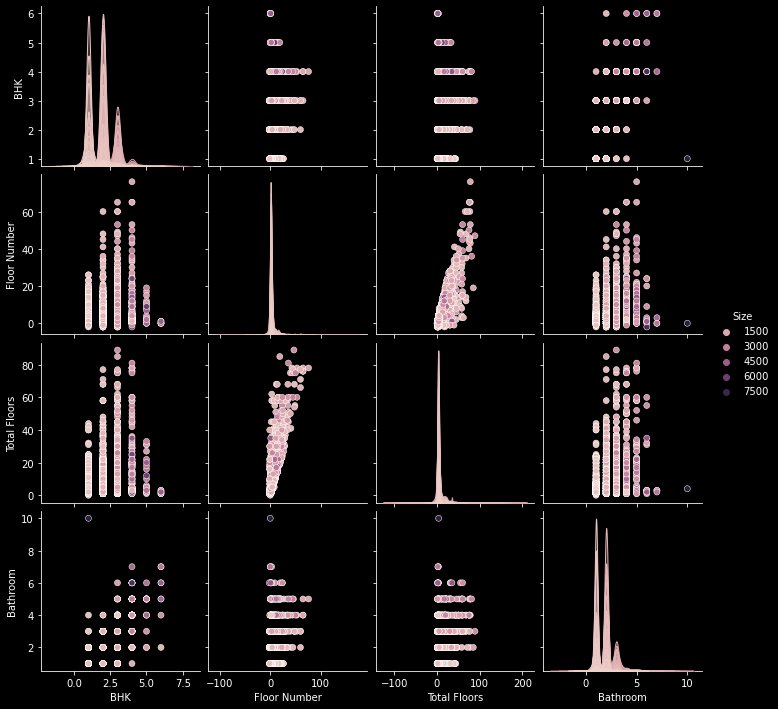

In [26]:
sns.pairplot(df[numerical_feat], hue="Size")

# Missing data handling

In [29]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].median(), inplace=True)

In [30]:
df.isnull().sum()

Posted On            0
BHK                  0
Size                 0
Floor Words          0
Floor Number         0
Total Floors         0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
Rent                 0
dtype: int64

<h3> Missing data has been handled.